# Introduction to PyTorch Part 1

> by Habib Bukhari and Roman Vaxenburg

In [1]:
import torch
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import numpy as np
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from matplotlib import animation, rc
import pandas as pd
import seaborn as sbn
!pip install fastdot -q
from fastdot import *
# import graphviz
rc('animation', html='jshtml')
%matplotlib inline

# Tensors

<div class="alert alert-block alert-info">
<b>Tensor </b> is the main datatype in pytorch. Essentially, tensors are N-dimentional arrays holding data. Tensors can also represent trainable parameters. In this case, tensors will also track all mathematical transformation applied to them for later gradient calculation (more on this later).
</div>




In this section:
* Tensor initialization
* Main attributes of tensors: dtype, device, requires_grad
* Tensor operations

## Tensor initialization

Let's initialize a tensor and take a look at its main attributes

In [2]:
x = torch.tensor([0, 1, 1, 2, 3, 5, 8]) # if not specified, dtype is inferred automatically
x

tensor([0, 1, 1, 2, 3, 5, 8])

In [3]:
x.shape

torch.Size([7])

In [4]:
x.dtype

torch.int64

In [5]:
x.device

device(type='cpu')

In [6]:
x.requires_grad

False

In [7]:
x = torch.tensor([0, 1, 1, 2, 3, 5, 8], dtype=torch.float32, device='cpu', requires_grad=False)
x

tensor([0., 1., 1., 2., 3., 5., 8.])

In [8]:
x.dtype

torch.float32

Other useful ways to create a tensor

In [9]:
x = torch.zeros(2, 3)
x

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [10]:
x = torch.ones(3, 2)
x

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [11]:
x = torch.rand(2, 4, 3) # random numbers between 0 and 1
x

tensor([[[0.4381, 0.1094, 0.7017],
         [0.2617, 0.6920, 0.8799],
         [0.9169, 0.8693, 0.8421],
         [0.8851, 0.4491, 0.3273]],

        [[0.2424, 0.0296, 0.8915],
         [0.9523, 0.9188, 0.5180],
         [0.1940, 0.3494, 0.7464],
         [0.3774, 0.5450, 0.7311]]])

In [12]:
x.shape #getting shape or size of the tensor

torch.Size([2, 4, 3])

## Indexing

In [13]:
x = torch.tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
x

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [14]:
x[0, 0] # single matrix element, [0, 0]

tensor(0)

In [15]:
x[0, 1] # etc.

tensor(1)

In [16]:
x[0] # 0-th row

tensor([0, 1, 2])

In [17]:
x[:, 0] # 0-th column

tensor([0, 3, 6])

In [18]:
x[1, 1:3] # row 1, columns from 1 to 3 (pythonic)

tensor([4, 5])

## Tensor operations

All the usual mathematical operations apply to tensors. Also, tensors can be reshaped, concatenated, stacked, permuted, etc.

In [19]:
a = torch.tensor([1.])
b = torch.tensor([2.])

In [20]:
print(a, a.dtype)
print(b, b.dtype)

tensor([1.]) torch.float32
tensor([2.]) torch.float32


#### Addition

In [21]:
a + b

tensor([3.])

#### Multiplication

In [22]:
a * b

tensor([2.])

#### Division

In [23]:
a / b

tensor([0.5000])

#### Square root, power, trigonometry, sum, absolute value, and anything else you can imagine

In [24]:
torch.sqrt(b)

tensor([1.4142])

In [25]:
torch.pow(b, 3) # overloading: b**3

tensor([8.])

In [26]:
torch.cos(b)

tensor([-0.4161])

In [27]:
x = torch.randn(3, 4)
x

tensor([[-0.0768,  0.4652, -1.2824, -0.8944],
        [ 1.7763, -0.7130,  1.3122, -0.5259],
        [-0.5078,  0.1318,  0.2831, -2.0472]])

In [28]:
torch.sum(x)

tensor(-2.0787)

In [29]:
torch.mean(x)

tensor(-0.1732)

In [30]:
torch.abs(x)

tensor([[0.0768, 0.4652, 1.2824, 0.8944],
        [1.7763, 0.7130, 1.3122, 0.5259],
        [0.5078, 0.1318, 0.2831, 2.0472]])

#### Reshaping tensors

In [31]:
x = torch.rand(3, 2)
x

tensor([[0.8411, 0.0155],
        [0.2088, 0.2033],
        [0.5066, 0.5778]])

In [32]:
x.shape

torch.Size([3, 2])

In [33]:
x.reshape(6)

tensor([0.8411, 0.0155, 0.2088, 0.2033, 0.5066, 0.5778])

In [34]:
x.reshape(2, 3)

tensor([[0.8411, 0.0155, 0.2088],
        [0.2033, 0.5066, 0.5778]])

In [35]:
x = torch.arange(9)
x

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [36]:
x = x.reshape(3, 3)
x.shape

torch.Size([3, 3])

In [37]:
x

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [38]:
x.T

tensor([[0, 3, 6],
        [1, 4, 7],
        [2, 5, 8]])

#### Concatenate tensors

In [39]:
a = torch.arange(9).view(3, 3)
b = torch.arange(9).view(3, 3) + 10

In [40]:
a

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [41]:
b

tensor([[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]])

In [42]:
x = torch.cat((a, b))
x

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]])

In [43]:
x.shape

torch.Size([6, 3])

In [44]:
x = torch.cat((a, b), dim=1) # concatenate along dimension 1 (dim=0 by default)
x

tensor([[ 0,  1,  2, 10, 11, 12],
        [ 3,  4,  5, 13, 14, 15],
        [ 6,  7,  8, 16, 17, 18]])

In [45]:
x.shape

torch.Size([3, 6])

## Derivatives and gradients

To train a model we will have to find optimal values of the model parameters. To do this, we will need to calculate derivatives.
<div class="alert alert-block alert-info">
<b>Derivative </b> -The definition of the derivative can be approached in two different ways. One is geometrical (as a slope of a curve) and the other one is physical (as a rate of change). <br>
</div>
Let's use a simple polynomial as an example: $f(x) = x^2 - 2x +3$

In [46]:
def f(x):
    return x**2 - 2*x + 3

# f = lambda x: x**2 - 2*x + 3 # another way to write this

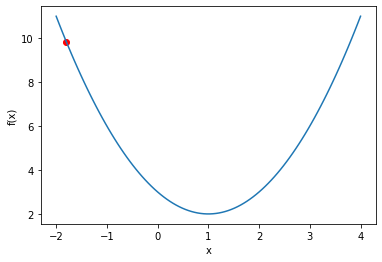

In [47]:
#hide
a = torch.linspace(-2, 4, 100) # tensor of 100 values from -2 to 4 with fixed step
plt.plot(a, f(a))
plt.scatter(-1.8, f(-1.8), color='red')
plt.xlabel('x')
plt.ylabel('f(x)');

<div class="alert alert-block alert-info">
Once tensor's attribute <b>requires_grad</b> is set to <b>True</b>, the sequence of all the subsequent operations will be recorded. Then, the derivative of the result of these calculations, with respect to the initial tensor, can be calculated. <br>
</div>

Let's try this!

In [48]:
xt = torch.tensor([4.], requires_grad=True)
xt

tensor([4.], requires_grad=True)

In [49]:
yt = f(xt)

In [50]:
yt

tensor([11.], grad_fn=<AddBackward0>)

In [51]:
yt.backward() # calculate the derivative of yt with respect to xt

In [52]:
xt.grad # this is the value of the derivative of yt with respect to xt

tensor([6.])

The derivative of $x^2 - 2x + 3$ is $2x - 2$. In our case $x=4$ so the gradinet (derivative) is $4\times 2 - 2 = 6$.

## Simple linear regression

<div class="alert alert-block alert-info">
In simple linear regression, we predict scores on one variable from the scores on a second variable. The variable we are predicting is called the criterion variable and is referred to as <b>y</b>. The variable we are basing our predictions on is called the predictor variable and is referred to as <b>x</b>. When there is only one predictor variable, the prediction method is called simple regression. In simple linear regression, the topic of this section, the predictions of <b>y</b> when plotted as a function of  form a straight. <br>
</div>

Now we are going to see how to fit the parameters of a very simple model to describe the given data best.

Suppose we have a dataset consisting of pairs of values $(x_i, y_i)$ with $i=0,1,2,...$. Let's pick a simple linear relation $y=mx+c$ and try to find the optimal values of the parameters $m$ and $c$ so that this linear relation matches the dataset to the best of its capability.

Linear regression is an approach to find a linear relationship between two variables and it's defind by the formula $y=mx+c$

First, let's use the same linear relation, add noise to it, and create the dataset!

$y_i = mx_i + c + \epsilon_i$

read more [here!](http://onlinestatbook.com/2/regression/intro.html)

In [53]:
n = 100
x = torch.rand(n, 1) # generate 100 random values of x
print(x[:10])
print(x.shape)

tensor([[0.3389],
        [0.6219],
        [0.0492],
        [0.4177],
        [0.2007],
        [0.1096],
        [0.2688],
        [0.7294],
        [0.9258],
        [0.5052]])
torch.Size([100, 1])


In [54]:
m_true = torch.tensor([3.,]) # pick m (arbitrary)
m_true

tensor([3.])

In [55]:
m_true.shape

torch.Size([1])

In [56]:
c_true = torch.tensor([0.]) # pick c (also arbitrary)
c_true

tensor([0.])

In [57]:
eps = torch.randn(n) / 3 # generate noise
eps

tensor([-0.1897, -0.1777, -0.3338, -0.0073,  0.1167,  0.4057, -0.1004, -0.0728,
        -0.2453,  0.1452, -0.4294,  0.0137, -0.6246,  0.2261,  0.3762, -0.1537,
        -0.5524, -0.5152,  0.1343, -0.2671, -0.6985, -0.2118, -0.1468,  0.1058,
         0.1882, -0.3457, -0.1790,  0.4115,  0.4597, -0.0782, -0.3274, -0.0115,
        -0.6976, -0.1065, -0.4022, -0.1456, -0.3848,  0.0477, -0.0905,  0.0873,
         0.7455, -0.2247, -0.2843, -0.6756,  0.0522, -0.4338,  0.4805, -0.3525,
        -0.4425,  0.0119, -0.5576,  0.5233,  0.0089, -0.3299, -0.0130, -0.2298,
         0.3338,  0.0218, -0.0221, -0.1762, -0.1129,  0.1831,  0.3085, -0.2828,
         0.2429,  0.4864,  0.0892,  0.1812, -0.0412,  0.6151, -0.2410,  0.1587,
        -0.3240,  0.3815,  0.2863,  0.0170,  0.3264,  0.0690, -0.2757,  0.4827,
         0.1937, -0.0139, -0.0283,  0.2344, -0.1278,  0.3965,  0.1431,  0.2193,
         0.3762,  0.1828, -0.4238, -0.0060,  0.6414, -0.3586,  0.0238,  0.1269,
         0.1498,  0.4946, -0.5273,  0.56

In [58]:
print(x.shape)
print(m_true.shape)
print(c_true.shape)
print(eps.shape)

torch.Size([100, 1])
torch.Size([1])
torch.Size([1])
torch.Size([100])


In [59]:
y = x@m_true + c_true + eps # generate the values of y corresponding to x

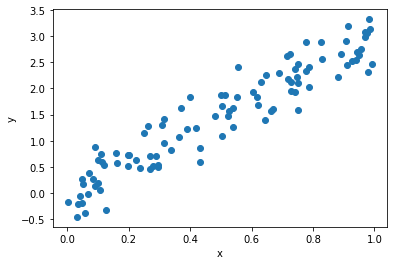

In [60]:
#hide
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y');

The dataset is ready!

## Fitting the model

Let's fit our simple model to the data we've just created.

We use Mean Squared Error (MSE) to measure the error of the model's line and data points. We want to find the values of $m$ and $c$ that minimize the value of MSE.

In [61]:
def mse(y_hat, y): 
    return ((y_hat - y)**2).mean()

In [62]:
m = torch.tensor([2.3])
c = torch.tensor([4.5])

In [63]:
print(m)
print(c)

tensor([2.3000])
tensor([4.5000])


In [64]:
y_pred_init = x@m + c

In [65]:
mse(y_pred_init, y)

tensor(17.5256)

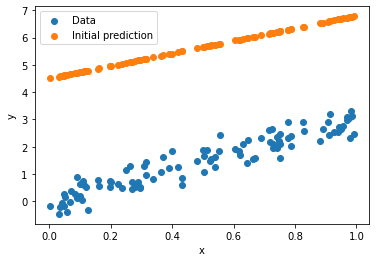

In [66]:
#hide
plt.scatter(x, y, label='Data')
plt.scatter(x, y_pred_init, label='Initial prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

Let's introduce `nn.Parameter`, or, equivalently, set `requires_grad=True`

<div class="alert alert-block alert-info">
<b>Parameter </b> -A model parameter is a configuration variable that is internal to the model and whose value can be estimated from data. <br>

They are required by the model when making predictions.<br>
They are learned from data.<br>
They are often not set manually by the practitioner.<br>
They are often saved as part of the learned model.<br>
</div>

In [67]:
m = torch.tensor([2.3])
c = torch.tensor([4.5])
m =  nn.Parameter(m)
c =  nn.Parameter(c)

### Simple training loop

Main components of the training loop: 

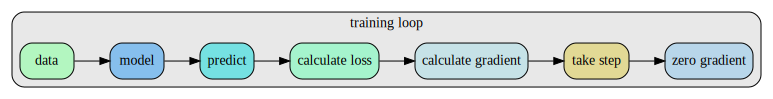

In [68]:
#hide
layers = ['data', 'model', 'predict', 'calculate loss', 'calculate gradient', 'take step', 'zero gradient']
block  = 'training loop'
g = graph_items(seq_cluster(layers, block))
g

<div class="alert alert-block alert-info">
<b>Forward pass</b> - pass your data through model <br>
<b>Calculate Loss</b> - calculate the eror between model prediction and ground truth <br>
<b>Backwards</b> - calculate the gradients <br>
<b>Step</b> - update the gradient (multiply gradient with learning rate) <br>
<b>Learning rate</b> -  hyperparameter that controls how much or how fast to change parameters  <br>   
<b>Hyperparameter</b> - is a configuration that is external to the model and whose value cannot be estimated from data <br>
</div>

In [69]:
def fit(lr):
    y_hat = x@m + c
    loss = mse(y, y_hat)
    if i % 100 == 0:
        print(f'i: {i}, MSE: {loss.item():.4f}')
    loss.backward()
    with torch.no_grad():
        m.data -= lr * m.grad
        c.data -= lr * c.grad
        m.grad.zero_()
        c.grad.zero_()

In [70]:
lr = 1e-1

In [71]:
for i in range(1000):
    fit(lr)

i: 0, MSE: 17.5256
i: 100, MSE: 0.1334
i: 200, MSE: 0.1076
i: 300, MSE: 0.1064
i: 400, MSE: 0.1063
i: 500, MSE: 0.1063
i: 600, MSE: 0.1063
i: 700, MSE: 0.1063
i: 800, MSE: 0.1063
i: 900, MSE: 0.1063


The model is trained by now. Let's compare the fitted parameters and the true ones

In [72]:
print(m_true)
print(m)

tensor([3.])
Parameter containing:
tensor([3.0123], requires_grad=True)


In [73]:
print(c_true)
print(c)

tensor([0.])
Parameter containing:
tensor([-0.0215], requires_grad=True)


Let's calculate the model prediction and plot it

In [74]:
y_pred = x@m + c

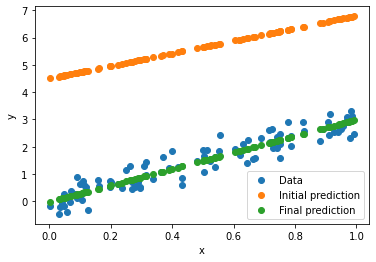

In [75]:
plt.scatter(x, y, label='Data')
plt.scatter(x, y_pred_init, label='Initial prediction')
plt.scatter(x, y_pred.detach(), label='Final prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

Let's visualize the training process

In [76]:
m = torch.Tensor([2.3])
c = torch.Tensor([4.5])
m =  nn.Parameter(m)
c =  nn.Parameter(c)

In [77]:
#hide
def animate(i):
    fit(lr)
    line.set_ydata((x@m + c).detach())
    return line

fig = plt.figure()
plt.scatter(x, y, c='C0', label='Data')
y_pred = x@m + c
line, = plt.plot(x, y_pred.detach(), 'C2', label='Model prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.close()
animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=50)

#### Instead of doing everything manually, let's do linear regression again, but use pytorch building blocks!

We will use `nn.Linear` and `optim.SGD`

In [78]:
n = 100
x = torch.rand(n, 1) 
m_true = torch.tensor([3.,])
c_true = torch.tensor([0.])
eps = torch.randn(n) / 3
y = x@m_true + c_true + eps

print(x.shape)
print(m_true.shape)
print(c_true.shape)

torch.Size([100, 1])
torch.Size([1])
torch.Size([1])


<div class="alert alert-block alert-info">
In pytorch, <b>y = mx + c </b> is simply a linear layer <b> nn.Linear </b> with simple interface and trainable parameters inside
</div>

In [79]:
model = nn.Linear(in_features=1, out_features=1, bias=True)

In [80]:
model.weight # this is m

Parameter containing:
tensor([[0.6764]], requires_grad=True)

In [81]:
model.bias # this is c

Parameter containing:
tensor([-0.3286], requires_grad=True)

In [82]:
list(model.parameters()) #accessing all the parameters

[Parameter containing:
 tensor([[0.6764]], requires_grad=True),
 Parameter containing:
 tensor([-0.3286], requires_grad=True)]

#### Forward pass

Calling `model(x)` is equalent to what we did before: `y = x@m + c`

In [83]:
y_pred_init = model(x)

In [84]:
loss = mse(y_pred_init, y)

In [85]:
loss

tensor(3.5854, grad_fn=<MeanBackward0>)

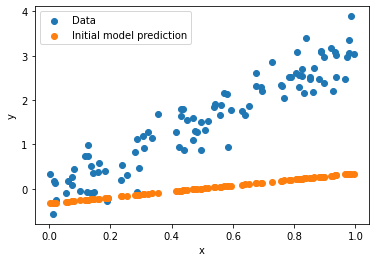

In [86]:
#hide
plt.scatter(x[:,0], y, label='Data')
plt.scatter(x[:,0],  y_pred_init.detach(), label='Initial model prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

<div class="alert alert-block alert-info">
Instead of updating the model parameters manually as we did before, a pytorch <b>optimizer</b> will update them for us. More advanced optimizers also keep track of gradient history to make parameter updates more efficient.
</div>

**without optimizer:**

```python
    loss.backward()
    with torch.no_grad():
        m.data -= lr * m.grad
        c.data -= lr * c.grad
        m.grad.zero_()
        c.grad.zero_()
```
**with optimizer:**

```python
    optimizer = optim.SGD(model.parameters(), lr=0.1)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
```


In [87]:
model = nn.Linear(in_features=1, out_features=1, bias=True)
optimizer = optim.SGD(model.parameters(), lr=0.1)
def fit():
    y_hat = model(x)
    loss = mse(y_hat.view(-1), y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if i % 100 == 0: 
        print(f'iteration: {i}, MSE: {loss.item():.4f}')

In [88]:
for i in range(1000): fit()

iteration: 0, MSE: 4.1871
iteration: 100, MSE: 0.1425
iteration: 200, MSE: 0.1292
iteration: 300, MSE: 0.1285
iteration: 400, MSE: 0.1284
iteration: 500, MSE: 0.1284
iteration: 600, MSE: 0.1284
iteration: 700, MSE: 0.1284
iteration: 800, MSE: 0.1284
iteration: 900, MSE: 0.1284


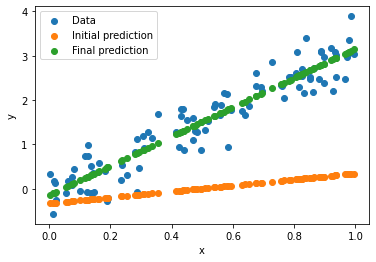

In [89]:
y_pred = model(x) #getting prediction

plt.scatter(x, y, label='Data')
plt.scatter(x, y_pred_init.detach(), label='Initial prediction')
plt.scatter(x, y_pred.detach(), label='Final prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();